# Modelo de Regresión Lineal en Python para Predecir los Precios de las Viviendas

In [49]:
# libreriras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #libreria de graficos 
%matplotlib inline
from scipy import stats


In [21]:
# montar drive 
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
# importar y asignar data a un df
df = pd.read_csv("/content/gdrive/MyDrive/BostonHousing/boston_house_prices.csv")


In [13]:
# informacion general del datset  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
# ver primeras lineas 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Descripcion de cada variable:

  - CRIM     per capita crime rate by town

  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
  
  - INDUS    proportion of non-retail business acres per town
  
  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  
  - NOX      nitric oxides concentration (parts per 10 million)
  
  - RM       average number of rooms per dwelling
  
  - AGE      proportion of owner-occupied units built prior to 1940
  
  - DIS      weighted distances to five Boston employment centres
  
  - RAD      index of accessibility to radial highways
  
  - TAX      full-value property-tax rate per $10,000
  
  - PTRATIO  pupil-teacher ratio by town
  
  - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  
  - LSTAT    % lower status of the population
  
  - MEDV     Median value of owner-occupied homes in $1000's


In [26]:
# eliminar columna
df.drop('B', axis=1, inplace=True)


In [27]:
# ver tipo y cantidad de datos 
print('"1. Conteo Tipo de Dato"')
tipos_datos = df.dtypes                           
print(tipos_datos.value_counts())                  
print('==========================')

## tipo datos en % 
print('"2. % por Tipo de Dato"')
tipos_datos = df.dtypes
print(tipos_datos.value_counts(normalize=True))  

"1. Conteo Tipo de Dato"
float64    10
int64       3
dtype: int64
"2. % por Tipo de Dato"
float64    0.769231
int64      0.230769
dtype: float64


In [28]:
# ver datos nulos por columna
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [46]:
# ver valores nulos por fila 
df[df.isnull().any(axis=1)]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [29]:
# estadistica descriptiva
round(df.describe(), 2).T.style.background_gradient(cmap='YlOrRd') 


,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.610000,8.600000,0.010000,0.080000,0.260000,3.680000,88.980000
ZN,506.000000,11.360000,23.320000,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.000000,11.140000,6.860000,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.070000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.550000,0.120000,0.380000,0.450000,0.540000,0.620000,0.870000
RM,506.000000,6.280000,0.700000,3.560000,5.890000,6.210000,6.620000,8.780000
AGE,506.000000,68.570000,28.150000,2.900000,45.020000,77.500000,94.070000,100.000000
DIS,506.000000,3.800000,2.110000,1.130000,2.100000,3.210000,5.190000,12.130000
RAD,506.000000,9.550000,8.710000,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.240000,168.540000,187.000000,279.000000,330.000000,666.000000,711.000000


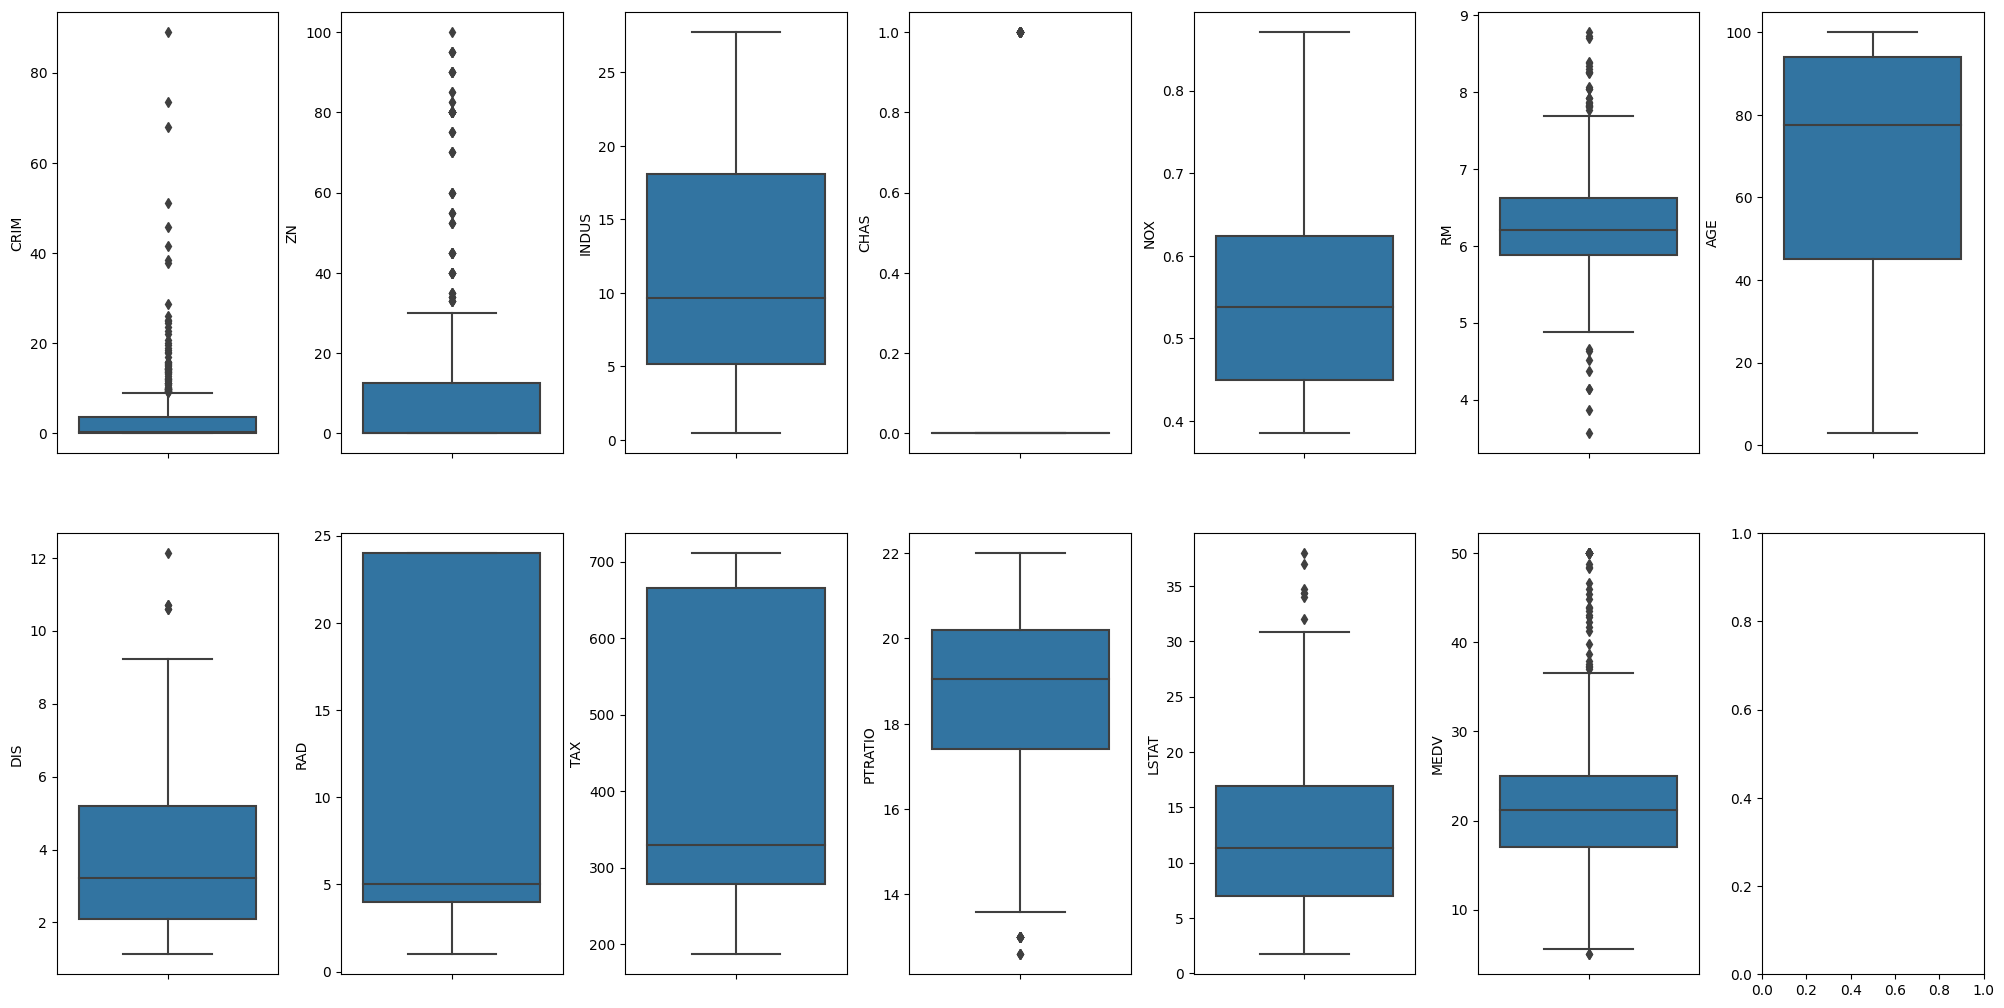

In [37]:
# distribucion de cada variable 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


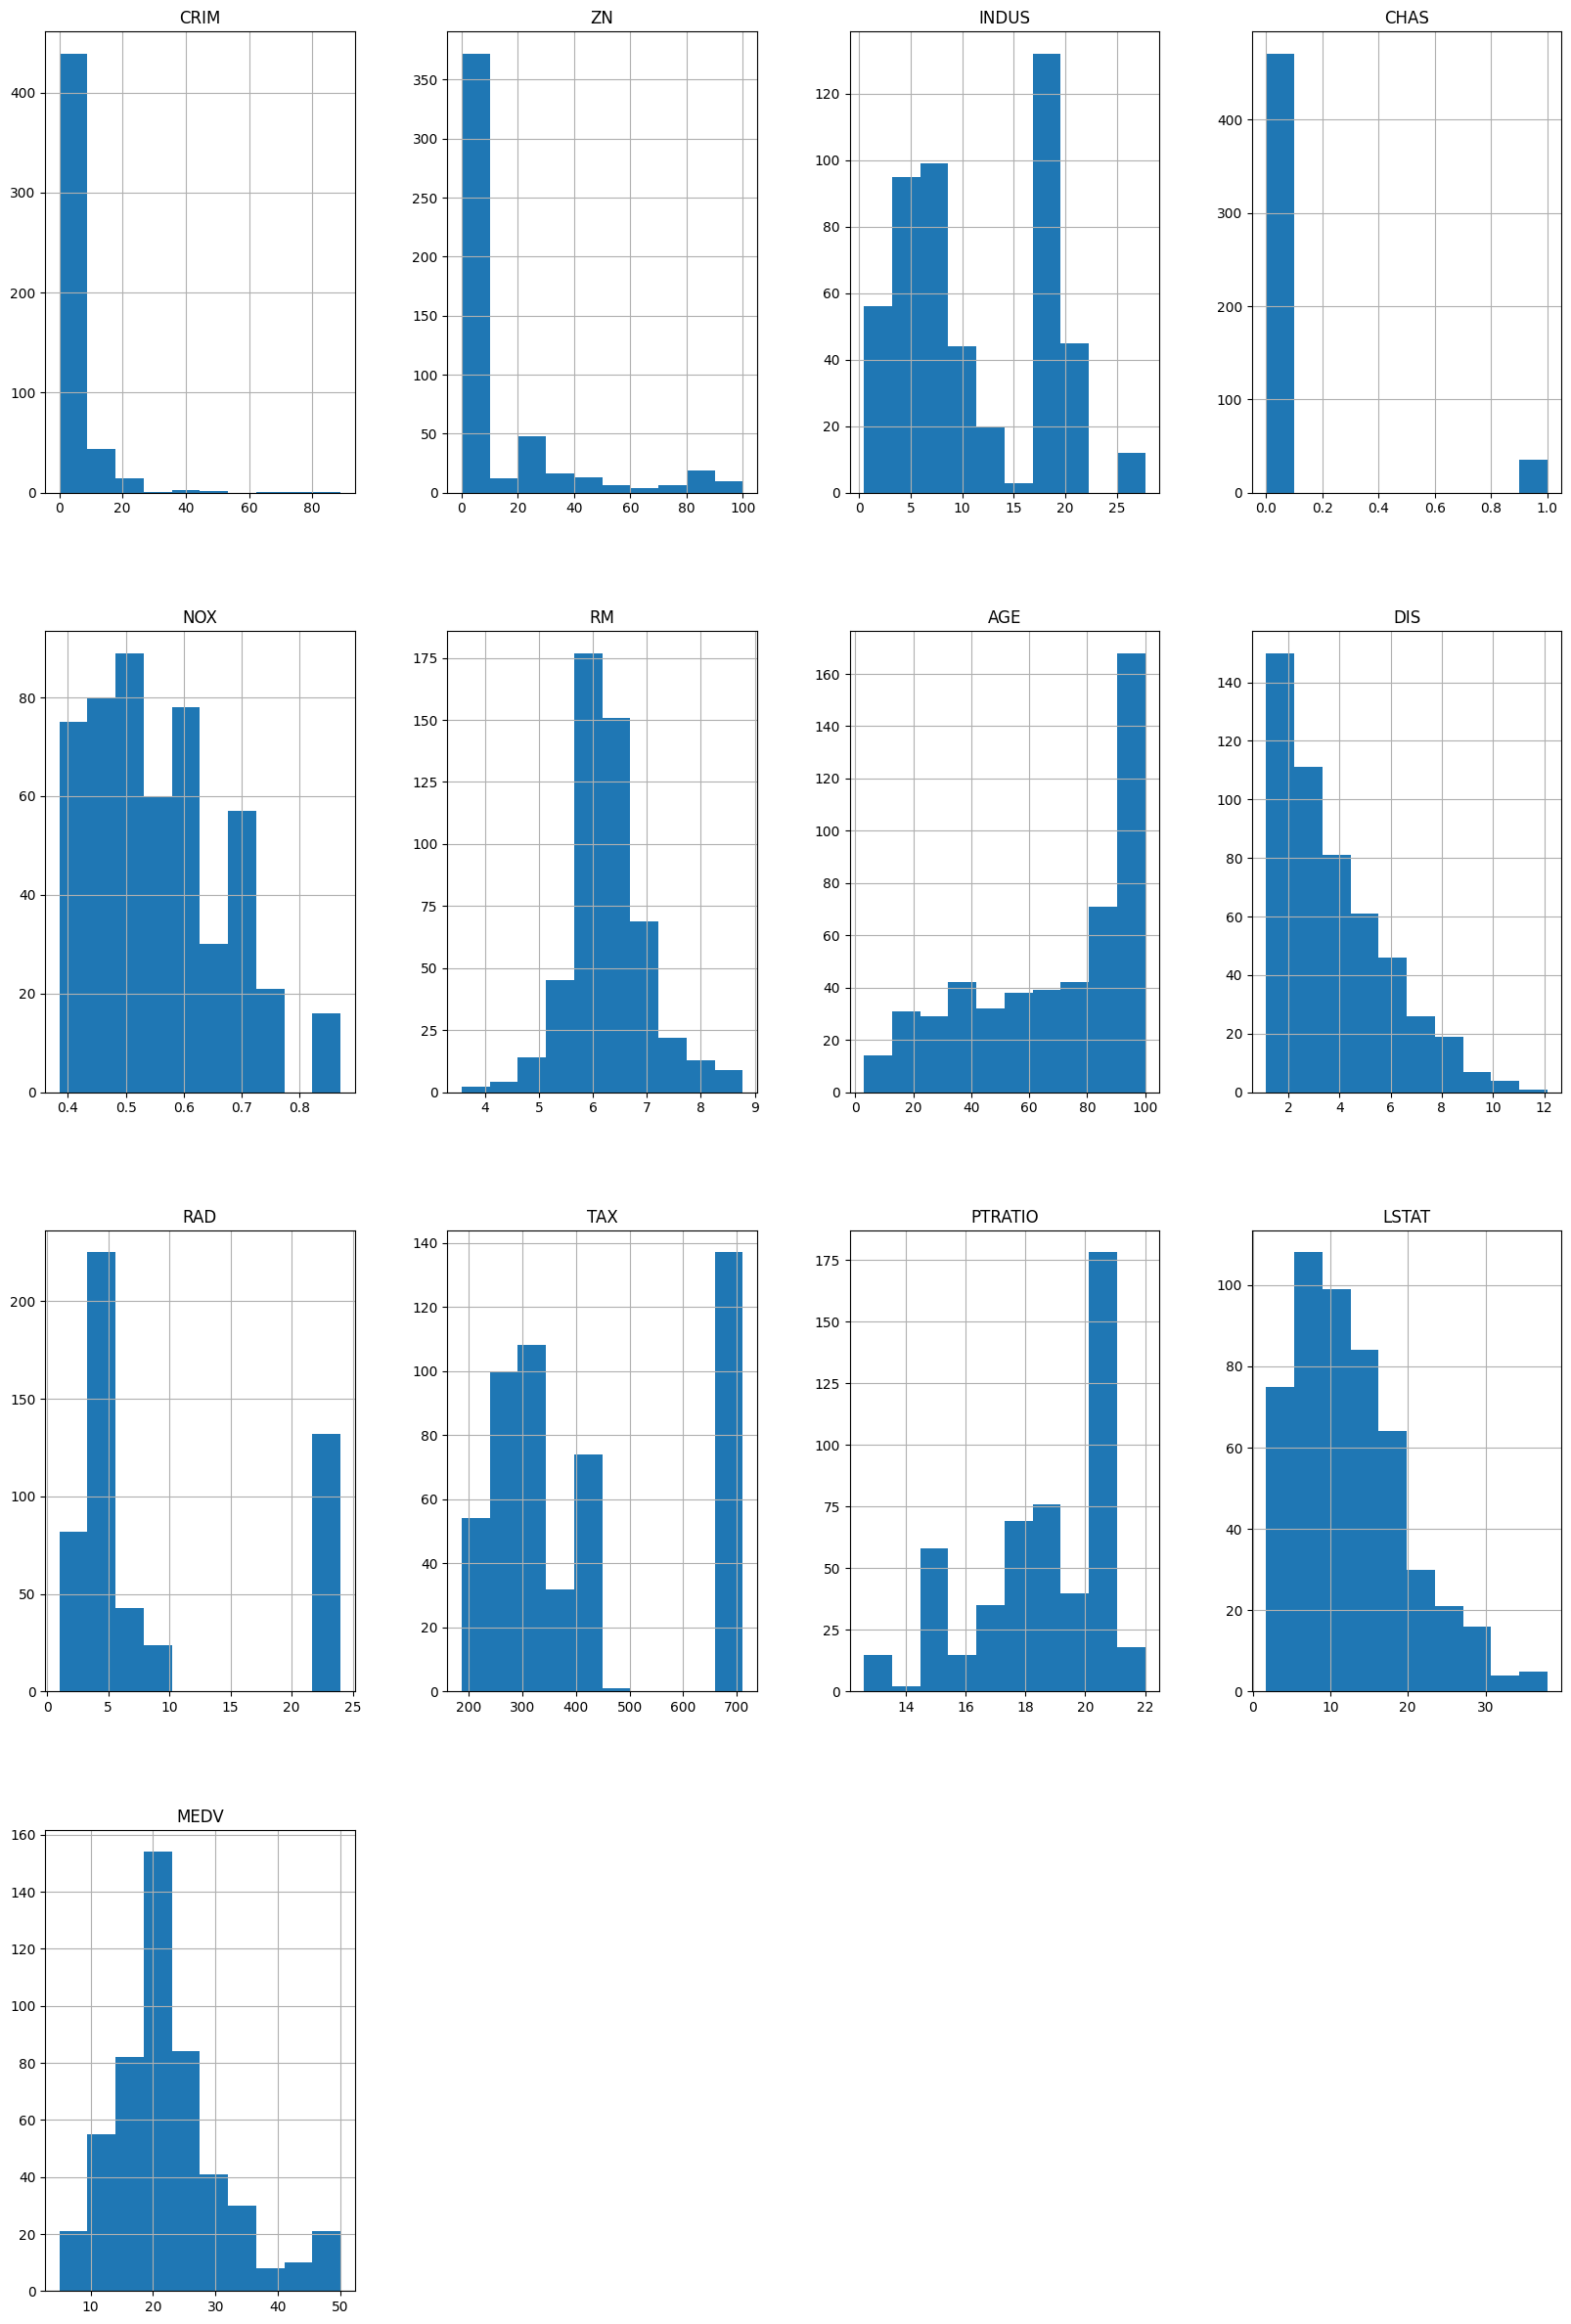

In [42]:
# distribucion por variable
df.hist(figsize=(20,30))
plt.show()


In [45]:
# ver outliers por variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
LSTAT       7
MEDV       40
dtype: int64

In [47]:
#matriz de correlacion
matriz_correlation = df.corr().style.background_gradient(cmap='Spectral')      
matriz_correlation


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


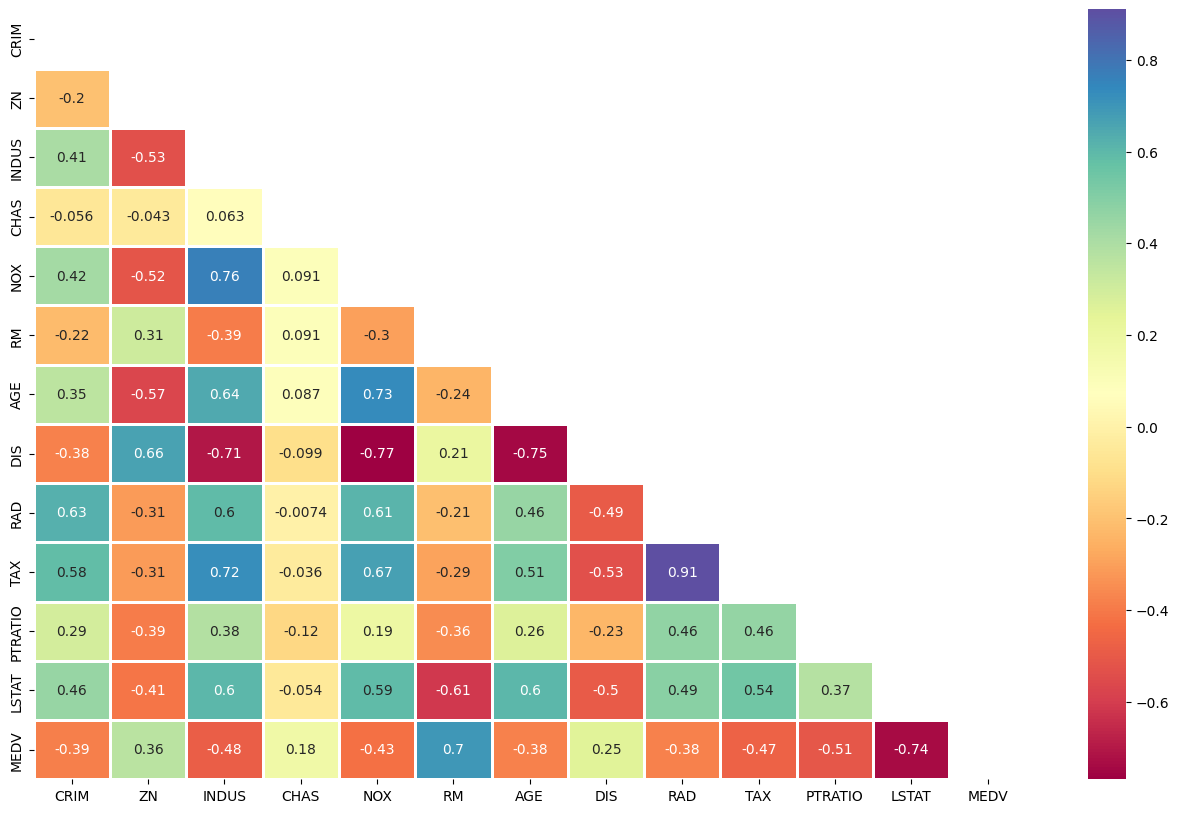

In [50]:
#grafico de correlacion con heatmap 
plt.figure(figsize=(16, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="Spectral");


Las variabbles que tienen correlacion con MEDV, son:

LSTAT -0.74 % más bajo de la población

RM 0.7 número medio de habitaciones por vivienda

PTRATIO -0.51 ratio alumno-profesor por ciudad

TAX -0.47  tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

INDUS -0.48 proporción de acres comerciales no minoristas por ciudad

NOX  -0.43 concentración de óxidos nítricos

RAD -0.38 índice de accesibilidad a autopistas radiales

In [52]:
#ver columnas 
df.columns 


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')